In [ ]:
# @title Connect GDrive

from google.colab import drive
drive.mount('/content/myDrive')

Mounted at /content/myDrive


In [ ]:
# @title Update ubuntu package list, install Java-21 and Download the SPMF Jar

import subprocess

# Update the package list
subprocess.run(["sudo", "apt-get", "update", "-qq"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
print("Package List Update completed.")

# Install OpenJDK 21
subprocess.run(["sudo", "apt-get", "install", "-qq", "openjdk-21-jdk"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
print("OpenJDK 21 installed.")

# Remove any existing spmf.jar file
subprocess.run(["rm", "-rf", "/content/spmf.jar"])

# Check the java version
result = subprocess.run(["java", "-version"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(result.stdout.decode('utf-8') if result.stdout else result.stderr.decode('utf-8'))

# Download spmf.jar
subprocess.run(["wget", "-q", "https://www.philippe-fournier-viger.com/spmf/spmf.jar", "-O", "/content/spmf.jar"])
print("SPMF jar downloaded.")

# Copy the directory from Drive to the content folder
subprocess.run(["cp", "-r", "/content/myDrive/MyDrive/DataMining/FPM Retail/spmf2", "/content/spmf2"])
print("Directory of SPMF Library copied successfully.")

Package List Update completed.
OpenJDK 21 installed.
openjdk version "21.0.5" 2024-10-15
OpenJDK Runtime Environment (build 21.0.5+11-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 21.0.5+11-Ubuntu-1ubuntu122.04, mixed mode, sharing)

SPMF jar downloaded.
Directory of SPMF Library copied successfully.


In [ ]:
# @title Import Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from spmf2 import Spmf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# @title Define I/O File Path
input_file1 = '/content/myDrive/MyDrive/DataMining/FPM Retail/dataset/retail1/retail1.txt'
output_file1 = '/content/myDrive/MyDrive/DataMining/FPM Retail/dataset/output/retail1_'

input_file2 = '/content/myDrive/MyDrive/DataMining/FPM Retail/dataset/retail2.txt'
output_file2 = '/content/myDrive/MyDrive/DataMining/FPM Retail/dataset/output/retail2_'

### Exercise 1

In [ ]:
algorithm = ['Apriori', 'FPGrowth_itemsets', 'Eclat']
min_sup = [0.005, 0.01, 0.02, 0.03, 0.05, 0.07]

In [ ]:
time_list = []
for algo in algorithm:
    time_temp = []
    outf = output_file1 + algo + '_1' + '.txt'
    for sup in min_sup:
        spmf = Spmf(algorithm_name=algo, input_filename=input_file1,
                    output_filename=outf, arguments=[sup])
        st = spmf.run()
        st = st.split('\n')
        # time_taken = st[-3].split(' ')[-2] # time taken
        # search for 'Total time' in the output
        for i in range(len(st)):
            if 'Total time' in st[i]:
                time_taken = int(st[i].split(' ')[-2])
                break
        time_temp.append(time_taken)
    time_list.append(time_temp)


>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 18039
 The algorithm stopped at size 5
 Frequent itemsets count : 396
 Maximum memory usage : 127.419189453125 mb
 Total time ~ 148957 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 4018
 The algorithm stopped at size 4
 Frequent itemsets count : 140
 Maximum memory usage : 126.6037826538086 mb
 Total time ~ 31016 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 741
 The algorithm stopped at size 3
 Frequent itemsets count : 45
 Maximum memory usage : 130.69140625 mb
 Total time ~ 5673 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 231
 The algorithm stopped at size 3
 Frequent itemsets count : 24
 Maximum memory usage : 131.67037963867188 mb
 Total time ~ 3751 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 45
 The algorithm stopped at size 3
 

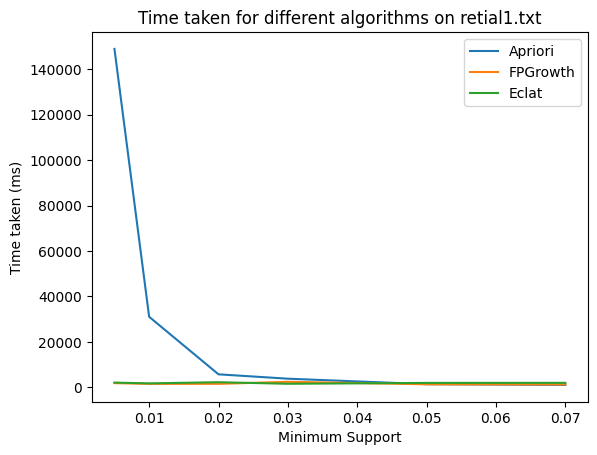

In [ ]:
# @title Plot the time taken for each algorithm
fig, ax = plt.subplots()
ax.plot(min_sup, time_list[0], label='Apriori')
ax.plot(min_sup, time_list[1], label='FPGrowth')
ax.plot(min_sup, time_list[2], label='Eclat')
ax.set_xlabel('Minimum Support')
ax.set_ylabel('Time taken (ms)')
ax.set_title('Time taken for different algorithms on retial1.txt')
ax.legend()
plt.show()

In [ ]:
time_list = []
for algo in algorithm:
    time_temp = []
    outf = output_file2 + algo + '_1' + '.txt'
    for sup in min_sup:
        spmf = Spmf(algorithm_name=algo, input_filename=input_file2,
                    output_filename=outf, arguments=[sup])
        st = spmf.run()
        st = st.split('\n')
        # time_taken = st[-3].split(' ')[-2] # time taken
        # search for 'Total time' in the output
        for i in range(len(st)):
            if 'Total time' in st[i]:
                time_taken = int(st[i].split(' ')[-2])
                break
        time_temp.append(time_taken)
    time_list.append(time_temp)


>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 24748
 The algorithm stopped at size 6
 Frequent itemsets count : 580
 Maximum memory usage : 32.247032165527344 mb
 Total time ~ 44459 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 2528
 The algorithm stopped at size 5
 Frequent itemsets count : 159
 Maximum memory usage : 28.5316162109375 mb
 Total time ~ 4244 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 226
 The algorithm stopped at size 5
 Frequent itemsets count : 55
 Maximum memory usage : 26.435928344726562 mb
 Total time ~ 1353 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 89
 The algorithm stopped at size 4
 Frequent itemsets count : 32
 Maximum memory usage : 27.48157501220703 mb
 Total time ~ 1604 ms

>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 24
 The algorithm stopped at size 

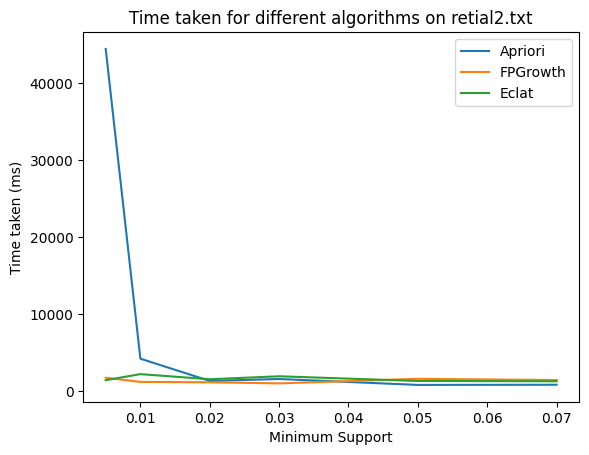

In [ ]:
# @title Plot the time taken for each algorithm
fig, ax = plt.subplots()
ax.plot(min_sup, time_list[0], label='Apriori')
ax.plot(min_sup, time_list[1], label='FPGrowth')
ax.plot(min_sup, time_list[2], label='Eclat')
ax.set_xlabel('Minimum Support')
ax.set_ylabel('Time taken (ms)')
ax.set_title('Time taken for different algorithms on retial2.txt')
ax.legend()
plt.show()

### Exercise 2

In [ ]:
algorithm = [ 'FPGrowth_itemsets', 'FPClose', 'FPMax']
min_sup = [0.005, 0.01, 0.02, 0.03, 0.05, 0.07]

In [ ]:
time_list = []
itemset_count_list = []
for algo in algorithm:
    time_temp = []
    itemset_temp = []
    outf = output_file1 + algo + '_2' + '.txt'
    for sup in min_sup:
        spmf = Spmf(algorithm_name=algo, input_filename=input_file1,
                    output_filename=outf, arguments=[sup])
        st = spmf.run()
        st = st.split('\n')
        # time_taken = st[-3].split(' ')[-2] # time taken
        # search for 'Total time' in the output
        for i in range(len(st)):
            if 'Total time' in st[i]:
                time_taken = int(st[i].split(' ')[-2])
                break
        for i in range(len(st)):
            if 'itemsets count' in st[i]:
                itemset_count = int(st[i].split(' ')[-1])
                break
        time_temp.append(time_taken)
        itemset_temp.append(itemset_count)
    time_list.append(time_temp)
    itemset_count_list.append(itemset_temp)

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 540455
 Max memory usage: 30.7567138671875 mb 
 Frequent itemsets count : 396
 Total time ~ 1760 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 540455
 Max memory usage: 28.52899169921875 mb 
 Frequent itemsets count : 140
 Total time ~ 1659 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 540455
 Max memory usage: 27.447288513183594 mb 
 Frequent itemsets count : 45
 Total time ~ 2621 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 540455
 Max memory usage: 14.397308349609375 mb 
 Frequent itemsets count : 24
 Total time ~ 1479 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 540455
 Max memory usage: 14.425048828125 mb 
 Frequent it

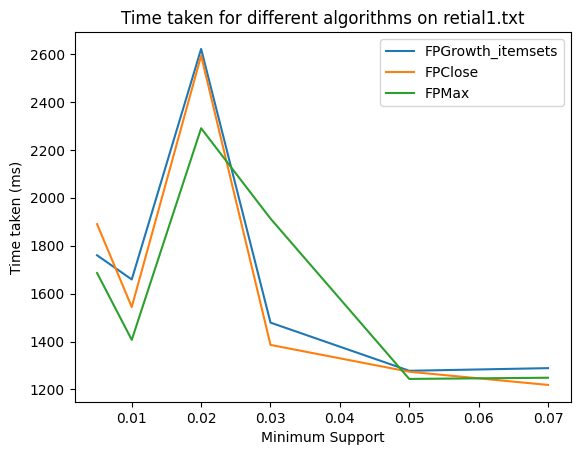

In [ ]:
# @title Plot time taken for each algorithm
fig, ax = plt.subplots()
ax.plot(min_sup, time_list[0], label='FPGrowth_itemsets')
ax.plot(min_sup, time_list[1], label='FPClose')
ax.plot(min_sup, time_list[2], label='FPMax')
ax.set_xlabel('Minimum Support')
ax.set_ylabel('Time taken (ms)')
ax.set_title('Time taken for different algorithms on retial1.txt')
ax.legend()
plt.show()

In [ ]:
# @title Create the table structure as a pandas DataFrame
columns = pd.MultiIndex.from_product([
    ["min-sup = 0.5%", "min-sup = 1%", "min-sup = 2%", "min-sup = 3%", "min-sup = 5%", "min-sup = 7%"],
    ["Time", "#itemsets"]
])

index = ["FP-Growth", "FPClose", "FPMax"]
table = pd.DataFrame(index=index, columns=columns)

# Fill the table with the data
for i in range(3):
    table.loc[index[i], ("min-sup = 0.5%", "Time")] = time_list[i][0]
    table.loc[index[i], ("min-sup = 1%", "Time")] = time_list[i][1]
    table.loc[index[i], ("min-sup = 2%", "Time")] = time_list[i][2]
    table.loc[index[i], ("min-sup = 3%", "Time")] = time_list[i][3]
    table.loc[index[i], ("min-sup = 5%", "Time")] = time_list[i][4]
    table.loc[index[i], ("min-sup = 7%", "Time")] = time_list[i][5]
    table.loc[index[i], ("min-sup = 0.5%", "#itemsets")] = itemset_count_list[i][0]
    table.loc[index[i], ("min-sup = 1%", "#itemsets")] = itemset_count_list[i][1]
    table.loc[index[i], ("min-sup = 2%", "#itemsets")] = itemset_count_list[i][2]
    table.loc[index[i], ("min-sup = 3%", "#itemsets")] = itemset_count_list[i][3]
    table.loc[index[i], ("min-sup = 5%", "#itemsets")] = itemset_count_list[i][4]
    table.loc[index[i], ("min-sup = 7%", "#itemsets")] = itemset_count_list[i][5]

# Display the table
table.fillna('', inplace=True)  # Fill with empty strings for a clean display
table

min-sup = 0.5%           min-sup = 1%           min-sup = 2%  \
                    Time #itemsets         Time #itemsets         Time   
FP-Growth           1760       396         1659       140         2621   
FPClose             1890         5         1544         5         2593   
FPMax               1686         5         1407         5         2290   

                    min-sup = 3%           min-sup = 5%            \
          #itemsets         Time #itemsets         Time #itemsets   
FP-Growth        45         1479        24         1278        10   
FPClose           5         1386         5         1274         5   
FPMax             5         1913         5         1244         5   

          min-sup = 7%            
                  Time #itemsets  
FP-Growth         1289         5  
FPClose           1219         5  
FPMax             1249         5

In [ ]:
time_list = []
itemset_count_list = []
for algo in algorithm:
    time_temp = []
    itemset_temp = []
    outf = output_file2 + algo + '_2' + '.txt'
    for sup in min_sup:
        spmf = Spmf(algorithm_name=algo, input_filename=input_file2,
                    output_filename=outf, arguments=[sup])
        st = spmf.run()
        st = st.split('\n')
        # time_taken = st[-3].split(' ')[-2] # time taken
        # search for 'Total time' in the output
        for i in range(len(st)):
            if 'Total time' in st[i]:
                time_taken = int(st[i].split(' ')[-2])
                break
        for i in range(len(st)):
            if 'itemsets count' in st[i]:
                itemset_count = int(st[i].split(' ')[-1])
                break
        time_temp.append(time_taken)
        itemset_temp.append(itemset_count)
    time_list.append(time_temp)
    itemset_count_list.append(itemset_temp)

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 88162
 Max memory usage: 71.24219512939453 mb 
 Frequent itemsets count : 580
 Total time ~ 1834 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 88162
 Max memory usage: 38.98326110839844 mb 
 Frequent itemsets count : 159
 Total time ~ 1174 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 88162
 Max memory usage: 28.408287048339844 mb 
 Frequent itemsets count : 55
 Total time ~ 1080 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 88162
 Max memory usage: 28.274993896484375 mb 
 Frequent itemsets count : 32
 Total time ~ 1749 ms

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 88162
 Max memory usage: 28.159530639648438 mb 
 Frequent ite

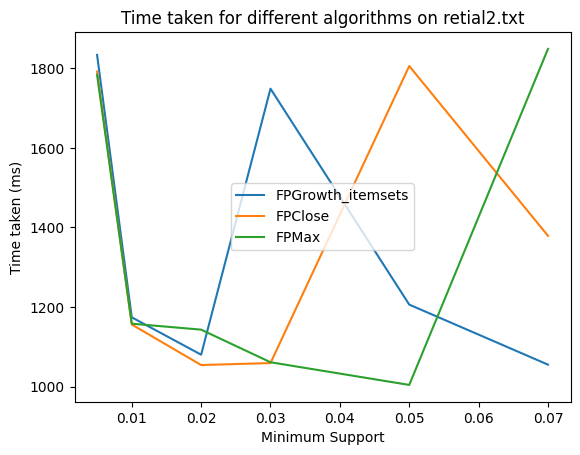

In [ ]:
# @title Plot time taken for each algorithm
fig, ax = plt.subplots()
ax.plot(min_sup, time_list[0], label='FPGrowth_itemsets')
ax.plot(min_sup, time_list[1], label='FPClose')
ax.plot(min_sup, time_list[2], label='FPMax')
ax.set_xlabel('Minimum Support')
ax.set_ylabel('Time taken (ms)')
ax.set_title('Time taken for different algorithms on retial2.txt')
ax.legend()
plt.show()

In [ ]:
# @title Create the table structure as a pandas DataFrame
columns = pd.MultiIndex.from_product([
    ["min-sup = 0.5%", "min-sup = 1%", "min-sup = 2%", "min-sup = 3%", "min-sup = 5%", "min-sup = 7%"],
    ["Time", "#itemsets"]
])

index = ["FP-Growth", "FPClose", "FPMax"]
table = pd.DataFrame(index=index, columns=columns)

# Fill the table with the data
for i in range(3):
    table.loc[index[i], ("min-sup = 0.5%", "Time")] = time_list[i][0]
    table.loc[index[i], ("min-sup = 1%", "Time")] = time_list[i][1]
    table.loc[index[i], ("min-sup = 2%", "Time")] = time_list[i][2]
    table.loc[index[i], ("min-sup = 3%", "Time")] = time_list[i][3]
    table.loc[index[i], ("min-sup = 5%", "Time")] = time_list[i][4]
    table.loc[index[i], ("min-sup = 7%", "Time")] = time_list[i][5]
    table.loc[index[i], ("min-sup = 0.5%", "#itemsets")] = itemset_count_list[i][0]
    table.loc[index[i], ("min-sup = 1%", "#itemsets")] = itemset_count_list[i][1]
    table.loc[index[i], ("min-sup = 2%", "#itemsets")] = itemset_count_list[i][2]
    table.loc[index[i], ("min-sup = 3%", "#itemsets")] = itemset_count_list[i][3]
    table.loc[index[i], ("min-sup = 5%", "#itemsets")] = itemset_count_list[i][4]
    table.loc[index[i], ("min-sup = 7%", "#itemsets")] = itemset_count_list[i][5]

# Display the table

table.fillna('', inplace=True)  # Fill with empty strings for a clean display
table

min-sup = 0.5%           min-sup = 1%           min-sup = 2%  \
                    Time #itemsets         Time #itemsets         Time   
FP-Growth           1834       580         1174       159         1080   
FPClose             1792        13         1156        13         1054   
FPMax               1784        13         1158        13         1143   

                    min-sup = 3%           min-sup = 5%            \
          #itemsets         Time #itemsets         Time #itemsets   
FP-Growth        55         1749        32         1206        16   
FPClose          13         1059        13         1806        13   
FPMax            13         1061        13         1004        13   

          min-sup = 7%            
                  Time #itemsets  
FP-Growth         1055        13  
FPClose           1379        13  
FPMax             1849        13

### Exercise 3

In [ ]:
# @title Import Additional Required Libraries
from collections import defaultdict
from typing import List, Set, Dict, FrozenSet

In [ ]:
class MSAprioriConfig:
    def __init__(self, delta: float, sdc: float, cannot_be_together: List[Set[int]], must_have: Set[int], min_mis: float, min_support: float):
        self.delta = delta
        self.sdc = sdc
        self.cannot_be_together = cannot_be_together
        self.must_have = must_have
        self.min_mis = min_mis
        self.min_support = min_support

class MSApriori:
    def __init__(self, config: MSAprioriConfig):
        self.config = config
        self.transactions = None
        self.n_transactions = 0
        self.support_counts = defaultdict(int)
        self.support = {}
        self.mis_values = {}
        self.item_names = None
        self.candidate_support_cache = {}

    def load_data(self, file_path: str) -> None:
        """Load transactions from a file."""
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Data file not found at {file_path}")

        transactions = []
        item_freq = defaultdict(int)

        with open(file_path, 'r') as file:
            for line in file:
                transaction = set(map(int, line.strip().split()))
                transactions.append(transaction)
                for item in transaction:
                    item_freq[item] += 1

        self.transactions = transactions
        self.n_transactions = len(transactions)

        # Calculate support
        self.support = {item: count / self.n_transactions for item, count in item_freq.items()}

        # Calculate MIS values
        avg_support = np.mean(list(self.support.values()))
        self.mis_values = {item: max(self.config.delta * sup, self.config.min_mis) for item, sup in self.support.items()}

    def support_of_itemset(self, itemset: Set[int]) -> float:
        """Efficiently calculate or retrieve the support of an itemset."""
        frozen_itemset = frozenset(itemset)
        if frozen_itemset in self.candidate_support_cache:
            return self.candidate_support_cache[frozen_itemset]

        support = sum(1 for transaction in self.transactions if itemset <= transaction) / self.n_transactions
        self.candidate_support_cache[frozen_itemset] = support
        return support

    def meets_constraints(self, itemset: Set[int]) -> bool:
        """Check itemset against must-have and cannot-be-together constraints."""
        if self.config.must_have and not itemset & self.config.must_have:
            return False
        for forbidden_set in self.config.cannot_be_together:
            if len(itemset & forbidden_set) > 1:
                return False
        return True

    def generate_candidates(self, prev_frequent: List[Set[int]], k: int) -> Set[FrozenSet[int]]:
        """Generate candidate itemsets of size k."""
        candidates = set()
        for i in range(len(prev_frequent)):
            for j in range(i + 1, len(prev_frequent)):
                set1, set2 = prev_frequent[i], prev_frequent[j]
                if len(set1.intersection(set2)) == k - 2:
                    candidate = set1.union(set2)
                    if len(candidate) == k and all(frozenset(candidate - {item}) in map(frozenset, prev_frequent) for item in candidate):
                        candidates.add(frozenset(candidate))
        return candidates

    def find_frequent_itemsets(self) -> Dict[int, List[Set[int]]]:
        """Mine frequent itemsets according to the Apriori algorithm."""
        frequent_itemsets = {}
        F1 = [{item} for item in self.support if self.support[item] >= self.mis_values[item] and self.meets_constraints({item})]

        if not F1:
            print("No frequent 1-itemsets found.")
            return frequent_itemsets

        frequent_itemsets[1] = F1
        print(f"\nFrequent 1-itemsets: {[sorted(list(itemset)) for itemset in F1]}")

        k = 2
        while True:
            candidates = self.generate_candidates(frequent_itemsets[k-1], k)
            if not candidates:
                break

            frequent_k = []
            for candidate in candidates:
                support = self.support_of_itemset(candidate)
                if support >= min(self.mis_values[item] for item in candidate) and self.meets_constraints(candidate):
                    frequent_k.append(set(candidate))

            if frequent_k:
                frequent_itemsets[k] = frequent_k
                print(f"\nFrequent {k}-itemsets: {[sorted(list(itemset)) for itemset in frequent_k]}")
            else:
                break

            k += 1
        return frequent_itemsets

    def find_frequent_itemsets_without_constraints(self):
        """Find frequent itemsets without enforcing item constraints."""
        frequent_itemsets = {}
        F1 = [{item} for item in self.support if self.support[item] >= self.mis_values[item]]
        frequent_itemsets[1] = F1

        k = 2
        while True:
            candidates = self.generate_candidates(frequent_itemsets[k-1], k)
            if not candidates:
                break

            frequent_k = []
            for candidate in candidates:
                support = self.support_of_itemset(candidate)
                if support >= min(self.mis_values[item] for item in candidate):
                    frequent_k.append(set(candidate))

            if frequent_k:
                frequent_itemsets[k] = frequent_k
            else:
                break

            k += 1
        return frequent_itemsets

In [ ]:
config = MSAprioriConfig(
    delta=0.3,
    sdc=0.3,
    cannot_be_together=[{1, 2, 3}, {6, 7, 9, 10}],
    must_have={},
    min_mis=0.01,
    min_support=0.01
)

miner = MSApriori(config)
data_file = input_file1
desc_file = "/content/myDrive/MyDrive/DataMining/FPM Retail/dataset/retail1/retail1Atrributes.xlsx"
miner.load_data(data_file)
frequent_itemsets = miner.find_frequent_itemsets()


Frequent 1-itemsets: [[1126], [2375], [2183], [1097], [1084], [1394], [644], [2316], [2363], [1142], [349], [1816], [1943], [2096], [1017], [593], [209], [298], [881], [508], [1456], [1182], [358], [114], [1534], [2339], [1131], [1324], [2395], [762], [324], [1680], [574], [1046], [181], [461], [1834], [2202], [2400], [1336], [2060], [225], [720], [754], [1012], [1407], [547], [1605], [1235], [781], [2398], [945], [2399], [189], [1264], [1721], [1215], [308], [2129], [90], [426], [1582], [479], [116], [1594], [860], [489], [1989], [2027], [2428], [983], [2231], [2380], [708], [1862], [2352], [1165], [21], [1617], [304], [355], [99], [1995], [2407], [530], [2232], [1825], [396], [1603]]

Frequent 2-itemsets: [[1534, 1603], [1097, 1126], [90, 1534], [225, 1336], [116, 426], [225, 720], [720, 1603], [1097, 2183], [426, 479], [21, 1534], [114, 1534], [1534, 1943], [426, 1534], [114, 1943], [99, 1534], [1943, 2232], [99, 1943], [1126, 2183], [479, 1534], [1816, 1834], [1394, 1989], [349, 1

### Exercise 4

In [ ]:
algorithm = 'MSApriori'
LS_values = [0.01, 0.03, 0.05]
min_sup = [0.005, 0.01, 0.02, 0.03, 0.05, 0.07]
time_list1 = []
itemset_count_list1 = []

In [ ]:
for LS in LS_values:
    time_temp = []
    itemset_temp = []
    outf = output_file1 + algorithm + '_4' + '.txt'
    for sup in min_sup:
        spmf = Spmf(algorithm_name=algorithm,
                    input_filename=input_file1,
                    output_filename=outf,
                    arguments=[sup, LS])
        output = spmf.run()
        output_lines = output.split('\n')

        time_taken = None
        itemset_count = None
        for line in output_lines:
            if 'Total time' in line:
                time_taken = int(line.split(' ')[-2])
            if 'Frequent itemsets count' in line:
                itemset_count = int(line.split(' ')[-1])

        time_temp.append(time_taken if time_taken is not None else 0)
        itemset_temp.append(itemset_count if itemset_count is not None else 0)

    time_list1.append(time_temp)
    itemset_count_list1.append(itemset_temp)

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 4, because there is no candidate
 Frequent itemsets count : 140
 Maximum memory usage : 627.6501541137695 mb
 Total time ~ 89613 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 4, because there is no candidate
 Frequent itemsets count : 140
 Maximum memory usage : 730.8344192504883 mb
 Total time ~ 87690 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 4, because there is no candidate
 Frequent itemsets count : 140
 Maximum memory usage : 660.0545043945312 mb
 Total time ~ 87346 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 4, because there is no candidate
 Frequent itemsets count : 140
 Maximum memory usage : 736.9175720214844 mb
 Total time ~ 88308 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algor

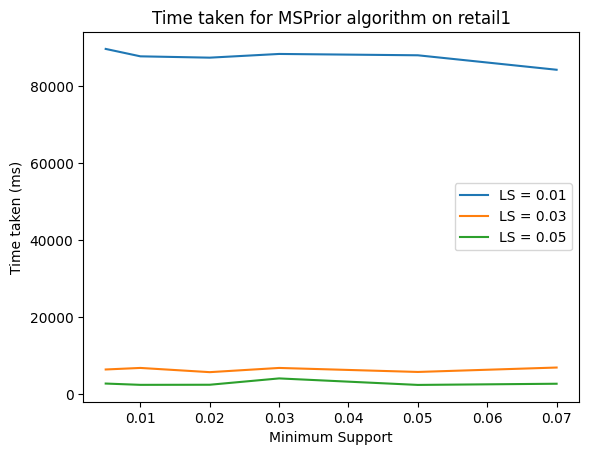

In [ ]:
# @title Plot the Time taken for MSPrior algorithm on retail1
fig, ax = plt.subplots()
for i, LS in enumerate(LS_values):
    ax.plot(min_sup, time_list1[i], label=f'LS = {LS}')
ax.set_xlabel('Minimum Support')
ax.set_ylabel('Time taken (ms)')
ax.set_title('Time taken for MSPrior algorithm on retail1')
ax.legend()
plt.show()

In [ ]:
time_list2 = []
itemset_count_list2 = []

for LS in LS_values:
    time_temp = []
    itemset_temp = []
    outf = output_file2 + algorithm + '_4' + '.txt'
    for sup in min_sup:
        spmf = Spmf(algorithm_name=algorithm,
                    input_filename=input_file2,
                    output_filename=outf,
                    arguments=[sup, LS])
        output = spmf.run()
        output_lines = output.split('\n')

        time_taken = None
        itemset_count = None
        for line in output_lines:
            if 'Total time' in line:
                time_taken = int(line.split(' ')[-2])
            if 'Frequent itemsets count' in line:
                itemset_count = int(line.split(' ')[-1])

        time_temp.append(time_taken if time_taken is not None else 0)
        itemset_temp.append(itemset_count if itemset_count is not None else 0)

    time_list2.append(time_temp)
    itemset_count_list2.append(itemset_temp)

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 5, because there is no candidate
 Frequent itemsets count : 159
 Maximum memory usage : 291.95125579833984 mb
 Total time ~ 20531 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 5, because there is no candidate
 Frequent itemsets count : 159
 Maximum memory usage : 248.54161071777344 mb
 Total time ~ 12598 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 5, because there is no candidate
 Frequent itemsets count : 159
 Maximum memory usage : 131.9766845703125 mb
 Total time ~ 9726 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 5, because there is no candidate
 Frequent itemsets count : 159
 Maximum memory usage : 414.26629638671875 mb
 Total time ~ 16029 ms

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The alg

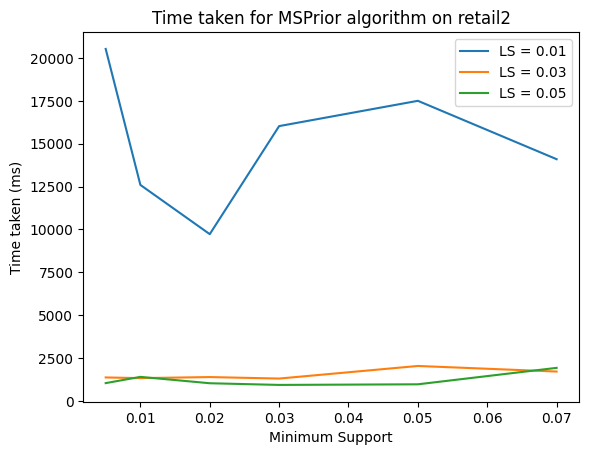

In [ ]:
# @title Plot Time taken for MSPrior algorithm on retail2
fig, ax = plt.subplots()
for i, LS in enumerate(LS_values):
    ax.plot(min_sup, time_list2[i], label=f'LS = {LS}')
ax.set_xlabel('Minimum Support')
ax.set_ylabel('Time taken (ms)')
ax.set_title('Time taken for MSPrior algorithm on retail2')
ax.legend()
plt.show()

In [ ]:
columns = pd.MultiIndex.from_product([
    [f"min-sup = {int(sup * 100)}%" for sup in min_sup],
    ["Time", "#itemsets"]
])

index = [f"LS = {LS}" for LS in LS_values] # Index for different LS values
table_file1 = pd.DataFrame(index=index, columns=columns)
#input_file1
for i, LS in enumerate(LS_values):
    for j, sup in enumerate(min_sup):
        table_file1.loc[f"LS = {LS}", (f"min-sup = {int(sup * 100)}%", "Time")] = time_list1[i][j]
        table_file1.loc[f"LS = {LS}", (f"min-sup = {int(sup * 100)}%", "#itemsets")] = itemset_count_list1[i][j]

# input_file2
table_file2 = pd.DataFrame(index=index, columns=columns)
for i, LS in enumerate(LS_values):
    for j, sup in enumerate(min_sup):
        table_file2.loc[f"LS = {LS}", (f"min-sup = {int(sup * 100)}%", "Time")] = time_list2[i][j]
        table_file2.loc[f"LS = {LS}", (f"min-sup = {int(sup * 100)}%", "#itemsets")] = itemset_count_list2[i][j]

# table
print("Results for retail1:")
print(table_file1)

print("\nResults for retail2:")
print(table_file2)

Results for retail1:
          min-sup = 0%           min-sup = 1%           min-sup = 2%  \
                  Time #itemsets         Time #itemsets         Time   
LS = 0.01        89613       140        87690       140        87346   
LS = 0.03         6429        24         6829        24         5734   
LS = 0.05         2775        10         2441        10         2466   

                    min-sup = 3%           min-sup = 5%            \
          #itemsets         Time #itemsets         Time #itemsets   
LS = 0.01       140        88308       140        87961       140   
LS = 0.03        24         6827        24         5787        24   
LS = 0.05        10         4110        10         2421        10   

          min-sup = 7%            
                  Time #itemsets  
LS = 0.01        84207       140  
LS = 0.03         6933        24  
LS = 0.05         2728        10  

Results for retail2:
          min-sup = 0%           min-sup = 1%           min-sup = 2%  \
   

### Exercise 5

#### 5 (A)

In [ ]:
# Define output file for FP-Growth itemsets
outf = output_file1 + 'FPGrowth_itemsets_5_1' + '.txt'
spmf = Spmf(algorithm_name='FPGrowth_itemsets', input_filename=input_file1,
            output_filename=outf, arguments=[0.005])  # using 0.5% as per Exercise specs
st = spmf.run()

>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 540455
 Max memory usage: 29.7330322265625 mb 
 Frequent itemsets count : 396
 Total time ~ 1818 ms



In [ ]:
# Read and parse the output file
with open(outf, 'r') as f:
    lines = f.readlines()

# Collect itemsets with support info, ignoring single-item sets
itemsets = []
for line in lines:
    line = line.split()
    if line[-2] == '#SUP:':
        itemset = line[:-2]  # Itemset is everything before '#SUP:'
        support = int(line[-1])  # Support is the last element
        if len(itemset) > 1:  # Only consider itemsets with more than 1 item
            itemsets.append((itemset, support))

# Sort itemsets based on support in descending order
itemsets = sorted(itemsets, key=lambda x: x[1], reverse=True)

# print the top 5 itemsets
for i in range(5):
    print(itemsets[i])

(['1534', '1943'], 29159)
(['1816', '1834'], 20265)
(['225', '1215'], 18970)
(['1394', '1989'], 15134)
(['1534', '1582'], 14136)


In [ ]:
# Take the top 5 itemsets as "cannot-be-together" sets
cannot_be_together = itemsets[:5]
cannot_be_together = [x[0] for x in cannot_be_together]  # Only the itemsets, no supports
print(f'cannot_be_together = {cannot_be_together}')

cannot_be_together = [['1534', '1943'], ['1816', '1834'], ['225', '1215'], ['1394', '1989'], ['1534', '1582']]


In [ ]:
# For "must-have" set, select the smallest item ID from each of the top 5 itemsets
must_have = {min(int(item) for item in itemset) for itemset in cannot_be_together}  # Set of unique minimum IDs
print(f'must_have = {must_have}')

must_have = {1816, 225, 1394, 1534}


#### 5 (B)

In [ ]:
# Use cannot-be-together and must-have set to obtain frequent itemsets
cannot_be_together = [set(map(int, itemset)) for itemset in cannot_be_together]
must_have = frozenset(must_have)

In [ ]:
# Update the MS-Apriori configuration (From Exercise 3)
config = MSAprioriConfig(
    delta=0.3,
    sdc=0.3,  # Support Difference Constraint
    cannot_be_together=cannot_be_together,
    must_have=must_have,
    min_mis=0.01,  # Minimum MIS value
    min_support=0.005  # 0.5% minimum support
)

# Initialize the MSApriori algorithm with the updated config
miner = MSApriori(config)

data_file = input_file1
miner.load_data(data_file)

In [ ]:
# Run the MS-Apriori algorithm to find frequent itemsets
frequent_itemsets = miner.find_frequent_itemsets()

# Report the number of frequent itemsets found
total_frequent_itemsets = sum(len(itemsets) for itemsets in frequent_itemsets.values())
print(f"Total number of frequent itemsets obtained: {total_frequent_itemsets}")


Frequent 1-itemsets: [[1394], [1816], [1534], [225]]
Total number of frequent itemsets obtained: 4


#### 5 (C)

In [ ]:
algorithm = 'MSApriori'
min_sup = 0.005  # 0.5%
LS = 0.01  # For SPMF LS parameter

outf = output_file1 + algorithm + '_5_3' + '.txt'

# Running MS-Apriori using SPMF on retail1 dataset
spmf = Spmf(algorithm_name=algorithm,
            input_filename=input_file1,
            output_filename=outf,
            arguments=[min_sup, LS])

output = spmf.run()  # Run the algorithm
output_lines = output.split('\n')

# Extract the count of frequent itemsets from SPMF output
itemset_count_spmf = None
for line in output_lines:
    if 'Frequent itemsets count' in line:
        itemset_count_spmf = int(line.split(' ')[-1])
        break

print(f"SPMF MS-Apriori frequent itemsets count: {itemset_count_spmf}")

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 4, because there is no candidate
 Frequent itemsets count : 140
 Maximum memory usage : 667.9407348632812 mb
 Total time ~ 87727 ms

SPMF MS-Apriori frequent itemsets count: 140


In [ ]:
outf = output_file2 + algorithm + '_5_3' + '.txt'

# Running MS-Apriori using SPMF on retail2 dataset
spmf = Spmf(algorithm_name=algorithm,
            input_filename=input_file2,
            output_filename=outf,
            arguments=[min_sup, LS])

output = spmf.run()  # Run the algorithm
output_lines = output.split('\n')

# Extract the count of frequent itemsets from SPMF output
itemset_count_spmf_2 = None
for line in output_lines:
    if 'Frequent itemsets count' in line:
        itemset_count_spmf_2 = int(line.split(' ')[-1])
        break

print(f"SPMF MS-Apriori frequent itemsets count: {itemset_count_spmf_2}")

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 5, because there is no candidate
 Frequent itemsets count : 159
 Maximum memory usage : 263.0525360107422 mb
 Total time ~ 12241 ms

SPMF MS-Apriori frequent itemsets count: 159


In [ ]:
# Run the modified MS-Apriori without item constraints on retail1
config = MSAprioriConfig(delta=0.5, sdc=0.05, cannot_be_together=[], must_have=set(), min_mis=0.01, min_support=0.005)
miner = MSApriori(config)
miner.load_data(input_file1)
frequent_itemsets_no_constraints = miner.find_frequent_itemsets_without_constraints()

# Count the number of frequent itemsets
num_itemsets_no_constraints = sum(len(itemsets) for itemsets in frequent_itemsets_no_constraints.values())
print(f"Custom MS-Apriori without constraints count: {num_itemsets_no_constraints}")

# Comparison output
print(f"Difference in itemset counts (SPMF - No constraints): {itemset_count_spmf - num_itemsets_no_constraints}")

Custom MS-Apriori without constraints count: 120
Difference in itemset counts (SPMF - No constraints): 20


In [ ]:
# Run the modified MS-Apriori without item constraints on retail2
config = MSAprioriConfig(delta=0.5, sdc=0.05, cannot_be_together=[], must_have=set(), min_mis=0.01, min_support=0.005)
miner = MSApriori(config)
miner.load_data(input_file2)
frequent_itemsets_no_constraints = miner.find_frequent_itemsets_without_constraints()

# Count the number of frequent itemsets
num_itemsets_no_constraints = sum(len(itemsets) for itemsets in frequent_itemsets_no_constraints.values())
print(f"Custom MS-Apriori without constraints count: {num_itemsets_no_constraints}")

# Comparison output
print(f"Difference in itemset counts (SPMF - No constraints): {itemset_count_spmf_2 - num_itemsets_no_constraints}")

Custom MS-Apriori without constraints count: 128
Difference in itemset counts (SPMF - No constraints): 31


#### 5 (D)

In [ ]:
import time

# Measure time for Exercise 3 without item constraints
start_time = time.time()
frequent_itemsets_no_constraints = miner.find_frequent_itemsets_without_constraints()
time_no_constraints = time.time() - start_time

print(f"Time for MS-Apriori without constraints: {time_no_constraints:.2f} seconds")

Time for MS-Apriori without constraints: 0.04 seconds


In [ ]:
# Measure time for Exercise 3 with item constraints
start_time = time.time()
frequent_itemsets_with_constraints = miner.find_frequent_itemsets()
time_with_constraints = time.time() - start_time

print(f"Time for MS-Apriori with constraints: {time_with_constraints:.2f} seconds")


Frequent 1-itemsets: [[9], [19], [32], [31], [36], [37], [38], [39], [41], [45], [48], [49], [60], [65], [78], [79], [101], [89], [110], [117], [123], [147], [161], [170], [175], [179], [185], [201], [225], [237], [242], [249], [258], [255], [264], [270], [271], [286], [301], [310], [338], [413], [438], [475], [479], [522], [533], [548], [589], [592], [604], [677], [740], [783], [824], [956], [1004], [1146], [1327], [1393], [2238], [2958], [3270], [10515], [12925], [13041], [14098], [15832], [16010], [16217]]

Frequent 2-itemsets: [[39, 438], [48, 101], [48, 270], [39, 12925], [39, 533], [48, 475], [36, 38], [48, 271], [32, 48], [48, 79], [48, 255], [39, 225], [39, 2238], [41, 48], [39, 48], [48, 413], [48, 310], [39, 1146], [48, 89], [38, 170], [48, 225], [39, 60], [39, 413], [48, 65], [39, 101], [39, 255], [48, 237], [39, 89], [37, 38], [39, 271], [39, 170], [39, 79], [48, 438], [39, 110], [39, 270], [39, 237], [48, 2238], [38, 48], [39, 475], [38, 286], [48, 1327], [39, 41], [38, 3

In [ ]:
# Measure time for SPMF with post-filtering for item constraints
start_time = time.time()
spmf_output = spmf.run()
time_spmf = time.time() - start_time

# Define function to apply item constraints as a filter
def apply_constraints(itemsets, must_have, cannot_be_together):
    filtered_itemsets = []
    for itemset in itemsets:
        itemset = itemset.split()[:-2]
        # print(itemset)

        # itemset_set = set(map(int, itemset.strip().split(' ')))
        itemset_set = set(map(int, itemset))
        print(itemset_set)

        # Check must-have constraint
        if not any(item in itemset_set for item in must_have):
            continue

        # Check cannot-be-together constraint
        if any(set(pair).issubset(itemset_set) for pair in cannot_be_together):
            continue

        filtered_itemsets.append(itemset_set)

    return filtered_itemsets

outfile_path = output_file1 + algorithm + '_5_3' + '.txt'

with open(outfile_path, 'r') as f:
    lines = f.readlines()

# print(lines)

filtered_itemsets = apply_constraints(lines, must_have, cannot_be_together)

print(f"SPMF time with constraints as post-filtering: {time_spmf:.2f} seconds")
print(f"Number of filtered itemsets: {len(filtered_itemsets)}")

# Print comparison of times
print(f"Comparison of times - No Constraints: {time_no_constraints:.2f}s, With Constraints: {time_with_constraints:.2f}s, SPMF: {time_spmf:.2f}s")

>/content/spmf.jar
=============  MSAPRIORI - STATS =============
 The algorithm stopped at level 5, because there is no candidate
 Frequent itemsets count : 159
 Maximum memory usage : 304.53358459472656 mb
 Total time ~ 17212 ms

{21}
{90}
{99}
{114}
{116}
{181}
{189}
{209}
{225}
{298}
{304}
{308}
{324}
{349}
{355}
{358}
{396}
{426}
{461}
{479}
{489}
{508}
{530}
{547}
{574}
{593}
{644}
{708}
{720}
{754}
{762}
{781}
{860}
{881}
{945}
{983}
{1012}
{1017}
{1046}
{1084}
{1097}
{1126}
{1131}
{1142}
{1165}
{1182}
{1215}
{1235}
{1264}
{1324}
{1336}
{1394}
{1407}
{1456}
{1534}
{1582}
{1594}
{1603}
{1605}
{1617}
{1680}
{1721}
{1816}
{1825}
{1834}
{1862}
{1943}
{1989}
{1995}
{2027}
{2060}
{2096}
{2129}
{2183}
{2202}
{2231}
{2232}
{2316}
{2339}
{2352}
{2363}
{2375}
{2380}
{2395}
{2398}
{2399}
{2400}
{2407}
{2428}
{21, 1534}
{90, 1534}
{90, 1943}
{99, 1534}
{99, 1943}
{114, 1534}
{114, 1943}
{426, 116}
{116, 479}
{225, 508}
{720, 225}
{225, 1215}
{1336, 225}
{1816, 225}
{225, 1834}
{225, 2339}
{